In [12]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

In [13]:
portfolio = {
  "portfolio": [

    {"symbol": "NVDA", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "AMD", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "META", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "GOOGL", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "TSLA", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "AMZN", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "MSFT", "totalValue": 1000, "percentageOfPortfolio": 12.5},
    {"symbol": "FSLY", "totalValue": 1000, "percentageOfPortfolio": 12.5}
  ]
}

# Extract symbols into a list
symbols = [entry["symbol"] for entry in portfolio["portfolio"]]

print(symbols)

['NVDA', 'AMD', 'META', 'GOOGL', 'TSLA', 'AMZN', 'MSFT', 'FSLY']


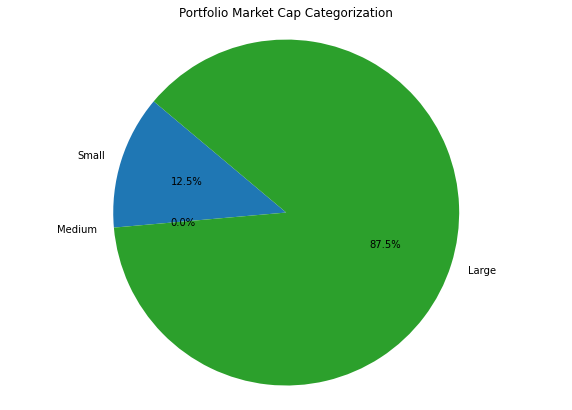

In [14]:
# Categorize symbols
cap_categories = {"Small": [], "Medium": [], "Large": []}

# Define market cap thresholds
small_cap_threshold = 2e9  # Less than $2 billion
medium_cap_threshold = 10e9  # $2 billion to $10 billion
large_cap_threshold = 10e9  # More than $10 billion

for symbol in symbols:
    ticker = yf.Ticker(symbol)
    try:
        market_cap = ticker.info['marketCap']
    except KeyError:
        market_cap = None  # or a default value, e.g., 0

    if market_cap is None:
        continue  # Skip this symbol
    if market_cap < small_cap_threshold:
        cap_categories["Small"].append(symbol)
    elif small_cap_threshold <= market_cap < medium_cap_threshold:
        cap_categories["Medium"].append(symbol)
    else:  # market_cap >= large_cap_threshold
        cap_categories["Large"].append(symbol)

# Prepare data for plotting
labels = cap_categories.keys()
sizes = [len(cap_categories[category]) for category in labels]

# Plotting
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Portfolio Market Cap Categorization')
plt.show()

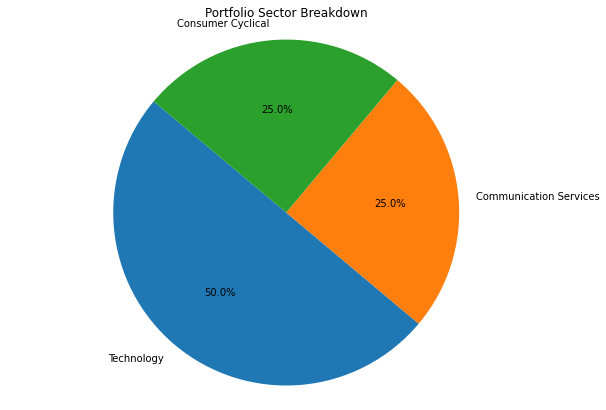

In [15]:
from collections import Counter

sectors = []

for symbol in symbols:
    ticker = yf.Ticker(symbol)
    info = ticker.info  # Fetch ticker info
    sector = info.get('sector', 'Unknown')  # Use 'Unknown' for symbols without a sector
    sectors.append(sector)

# Count how many symbols belong to each sector
sector_counts = Counter(sectors)

# Prepare data for plotting
labels = sector_counts.keys()
sizes = sector_counts.values()

# Plotting
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Portfolio Sector Breakdown')
plt.show()

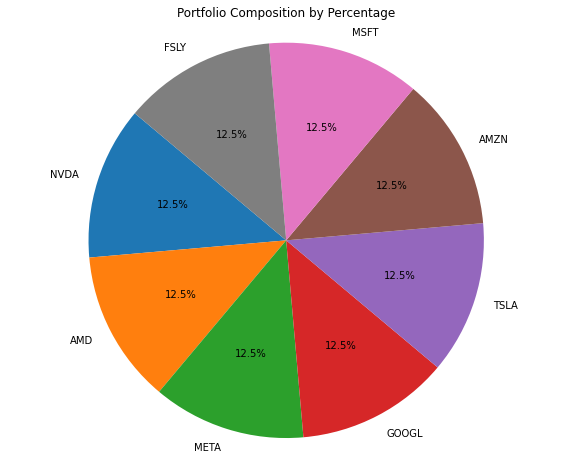

In [16]:
# Extract the symbols and their respective portfolio percentages
symbols = [item['symbol'] for item in portfolio['portfolio'] if item['percentageOfPortfolio'] > 2 ]
percentages = [item['percentageOfPortfolio'] for item in portfolio['portfolio'] if item['percentageOfPortfolio'] > 2 ]

# Plotting the portfolio percentages on a pie chart
plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=symbols, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Portfolio Composition by Percentage')
plt.show()